In [16]:
import matplotlib.pyplot as plt
import pandas as pd  
from scipy.stats import spearmanr
import gzip
import shutil
with gzip.open('GDS5037.soft.gz', 'rb') as f_in:
    with open('GDS5037soft.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

## 1.

Download and unzip the `DataSet SOFT file` from https://www.ncbi.nlm.nih.gov/sites/GDSbrowser?acc=GDS5037 . The SOFT file format contains tabular gene expression data accompanied by its metadata. The rows that start with either `^`, `!`, or `#` are metadata, which can be ignored in this exercise.

Some useful pieces of information about the file `GDS5037.soft`:

- The first 160 rows and the last row are metadata.
- The `ID_REF` column contains probe ids. Use them as row names.
- The `IDENTIFIER` column contains gene names.
- The other columns contain gene expression levels for subjects.

Load and filter the data such that your data frame only contains the probe and subject ids listed in the files `51-probes.ids` and `51-subjects.ids`, respectively.

1. For each subject, calculate the mean expression level over the genes. Do you notice any obvious differences between the subjects?

1. For each probe, calculate the mean expression level over the subjects. Do you notice any obvious differences between the probes?

1. How many probes are there with a mean greater than 10.0? Which genes do they correspond to?

In [17]:
file1 = open('GDS5037soft.csv', 'r')
Lines = file1.readlines()
 
count = 1
# Strips the newline character
for line in Lines:
    if "!dataset_table_begin" in line:
        break
    count += 1
 


#		GSM1068458	GSM1068459	GSM1068460	GSM1068461	GSM1068464	GSM1068468	GSM1068472	GSM1068473	GSM1068474	GSM1068476	GSM1068477	GSM1068462	GSM1068463	GSM1068465	GSM1068466	GSM1068467	GSM1068469	GSM1068470	GSM1068471	GSM1068475	GSM1068528	GSM1068531	GSM1068532	GSM1068533	GSM1068535	GSM1068537	GSM1068538	GSM1068539	GSM1068540	GSM1068542	GSM1068543	GSM1068544	GSM1068545	GSM1068546	GSM1068547	GSM1068548	GSM1068549	GSM1068550	GSM1068551	GSM1068552	GSM1068555	GSM1068556	GSM1068557	GSM1068560	GSM1068561	GSM1068562	GSM1068563	GSM1068565	GSM1068529	GSM1068530	GSM1068534	GSM1068536	GSM1068541	GSM1068553,"GSM1068554","GSM1068558","GSM1068559","GSM1068564"]) 


In [18]:
columns1="ID_REF    IDENTIFIER    GSM1068478    GSM1068479    GSM1068481    GSM1068482    GSM1068483    GSM1068486    GSM1068487    GSM1068488    GSM1068490    GSM1068491    GSM1068492    GSM1068493    GSM1068494    GSM1068495    GSM1068496    GSM1068498    GSM1068499    GSM1068500    GSM1068502    GSM1068503    GSM1068505    GSM1068506    GSM1068507    GSM1068508    GSM1068510    GSM1068512    GSM1068513    GSM1068514    GSM1068517    GSM1068518    GSM1068520    GSM1068521    GSM1068522    GSM1068524    GSM1068527    GSM1068480    GSM1068484    GSM1068485    GSM1068489    GSM1068497    GSM1068501    GSM1068504    GSM1068509    GSM1068511    GSM1068515    GSM1068516    GSM1068519    GSM1068523    GSM1068525    GSM1068526    GSM1068458    GSM1068459    GSM1068460    GSM1068461    GSM1068464    GSM1068468    GSM1068472    GSM1068473    GSM1068474    GSM1068476    GSM1068477    GSM1068462    GSM1068463    GSM1068465    GSM1068466    GSM1068467    GSM1068469    GSM1068470    GSM1068471    GSM1068475    GSM1068528    GSM1068531    GSM1068532    GSM1068533    GSM1068535    GSM1068537    GSM1068538    GSM1068539    GSM1068540    GSM1068542    GSM1068543    GSM1068544    GSM1068545    GSM1068546    GSM1068547    GSM1068548    GSM1068549    GSM1068550    GSM1068551    GSM1068552    GSM1068555    GSM1068556    GSM1068557    GSM1068560    GSM1068561    GSM1068562    GSM1068563    GSM1068565    GSM1068529    GSM1068530    GSM1068534    GSM1068536    GSM1068541    GSM1068553    GSM1068554    GSM1068558    GSM1068559    GSM1068564".split("    ")


In [19]:
probes_list=pd.read_csv("51-probes.ids").values.tolist()
subject_list=pd.read_csv("51-subjects.ids").values.tolist()
print(subject_list)


[['GSM1068486'], ['GSM1068492'], ['GSM1068498'], ['GSM1068505'], ['GSM1068512'], ['GSM1068520'], ['GSM1068480'], ['GSM1068501'], ['GSM1068516'], ['GSM1068458'], ['GSM1068468'], ['GSM1068477'], ['GSM1068467'], ['GSM1068528'], ['GSM1068537'], ['GSM1068543'], ['GSM1068548'], ['GSM1068555'], ['GSM1068562']]


In [20]:
df1=pd.read_csv("GDS5037soft.csv", skiprows=count+1, delim_whitespace=True,header=None, names=columns1,index_col=None)
df1.rename(columns={0: "ID_REF", 1: "IDENTIFIER"},inplace=True)

print(df1.head(2))
print("Before truncating, shape = ",df1.shape)

df1["ID_REF"]=df1["ID_REF"].astype("str")
#print("Types ",df1.dtypes)

         ID_REF IDENTIFIER  GSM1068478  GSM1068479  GSM1068481  GSM1068482  \
0  A_23_P100001    FAM174B    11.76500    11.15030    11.82380    10.96300   
1  A_23_P100011      AP3S2     6.68845     6.29378     5.77885     6.20746   

   GSM1068483  GSM1068486  GSM1068487  GSM1068488  ...  GSM1068529  \
0     11.6347    11.07970    11.30700    11.17300  ...    11.46210   
1      4.7852     5.38453     5.88975     6.39307  ...     6.53933   

   GSM1068530  GSM1068534  GSM1068536  GSM1068541  GSM1068553  GSM1068554  \
0    11.13460     11.5331    11.30700    11.03410    10.68630    11.13070   
1     5.77446      5.8417     5.98821     5.76583     5.92124     5.72922   

   GSM1068558  GSM1068559  GSM1068564  
0    11.19560    11.13110    10.79130  
1     6.91738     6.35952     6.13216  

[2 rows x 110 columns]
Before truncating, shape =  (41109, 110)


In [21]:
import numpy as np
df1.columns
subject_list=np.array([subject_list])
subject_list=subject_list.reshape(-1).tolist()

#print(columns1)
#print(subject_list)
truncated_columns=[]
truncated_columns+=[val for val in subject_list if val in columns1]
truncated_columns.insert(0,"ID_REF")
truncated_columns.insert(1,"IDENTIFIER" )
print(truncated_columns)
df2=df1[truncated_columns]
print("Shape after column truncation ",df2.shape)
df2.head(3)

['ID_REF', 'IDENTIFIER', 'GSM1068486', 'GSM1068492', 'GSM1068498', 'GSM1068505', 'GSM1068512', 'GSM1068520', 'GSM1068480', 'GSM1068501', 'GSM1068516', 'GSM1068458', 'GSM1068468', 'GSM1068477', 'GSM1068467', 'GSM1068528', 'GSM1068537', 'GSM1068543', 'GSM1068548', 'GSM1068555', 'GSM1068562']
Shape after column truncation  (41109, 21)


,ID_REF,IDENTIFIER,GSM1068486,GSM1068492,GSM1068498,GSM1068505,GSM1068512,GSM1068520,GSM1068480,GSM1068501,...,GSM1068458,GSM1068468,GSM1068477,GSM1068467,GSM1068528,GSM1068537,GSM1068543,GSM1068548,GSM1068555,GSM1068562
0,A_23_P100001,FAM174B,11.07970,11.17900,11.27430,11.10060,11.66770,11.35900,11.42190,10.75010,...,11.13030,11.31870,10.70100,11.25270,11.22920,11.11020,11.18100,11.11270,11.38440,10.97140
1,A_23_P100011,AP3S2,5.38453,5.95714,6.62565,5.85951,6.51948,6.20242,5.79675,5.83011,...,7.12339,5.75553,5.64214,6.27389,5.15579,5.77316,6.11452,5.82192,6.33731,5.93867
2,A_23_P100022,SV2B,5.64204,4.87800,7.42021,5.13132,3.34231,5.57106,4.86169,6.26661,...,2.71460,7.41385,7.00057,6.42909,5.51513,3.34119,4.19717,3.96164,7.06084,6.03255


## 2.

Load the file `GDS5037.soft` (see Exercise 5.1) and filter the data such that it only contains the probe ids listed in the file `52-probes.ids` and the subject ids listed in the files `52-control.ids` and `52-asthma.ids`.

1. Create a box plot of gene expression levels for each subject. Do you notice visible differences between the subjects or between the groups?

1. Use a T-test to find differentially expressed genes (i.e. probes for which the means are different between the control and asthma groups). Adjust the p-values with the Benjamini-Hochberg method.

1. Create histograms of the unadjusted and adjusted p-values. Why do these two histograms differ?

1. How many differentially expressed genes (i.e. statistically significant differences) are there at the false discovery rate of 0.05?

1. Sort the adjusted p-values in ascending order. Which genes do the first ten probes correspond to?

In [22]:
# 2.1

df2.mean(axis=0)

C:\Users\Faiza Anan Noor\AppData\Local\Temp\ipykernel_8212\375185932.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.mean(axis=0)


GSM1068486    6.682798
GSM1068492    6.668612
GSM1068498    6.616607
GSM1068505    6.659244
GSM1068512    6.666250
GSM1068520    6.641091
GSM1068480    6.662559
GSM1068501    6.671283
GSM1068516    6.655606
GSM1068458    6.651997
GSM1068468    6.663429
GSM1068477    6.676501
GSM1068467    6.640097
GSM1068528    6.692038
GSM1068537    6.664174
GSM1068543    6.659702
GSM1068548    6.665979
GSM1068555    6.652557
GSM1068562    6.670415
dtype: float64

In [23]:
# 2.2
df2.mean(axis=1)

C:\Users\Faiza Anan Noor\AppData\Local\Temp\ipykernel_8212\2338612204.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2.mean(axis=1)


0        11.171653
1         6.005155
2         5.426935
3         1.486402
4         9.163728
           ...    
41104          NaN
41105          NaN
41106          NaN
41107          NaN
41108          NaN
Length: 41109, dtype: float64

In [24]:
# 2.3

df2[df2.mean(axis=1)>10]

C:\Users\Faiza Anan Noor\AppData\Local\Temp\ipykernel_8212\2666752800.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2[df2.mean(axis=1)>10]


,ID_REF,IDENTIFIER,GSM1068486,GSM1068492,GSM1068498,GSM1068505,GSM1068512,GSM1068520,GSM1068480,GSM1068501,...,GSM1068458,GSM1068468,GSM1068477,GSM1068467,GSM1068528,GSM1068537,GSM1068543,GSM1068548,GSM1068555,GSM1068562
0,A_23_P100001,FAM174B,11.07970,11.17900,11.27430,11.1006,11.6677,11.3590,11.42190,10.75010,...,11.1303,11.3187,10.70100,11.25270,11.22920,11.11020,11.18100,11.1127,11.3844,10.9714
14,A_23_P100196,USP10,11.24910,11.58620,11.21350,11.7468,10.7995,11.2447,11.34510,11.36030,...,11.3527,11.0824,11.63910,10.92170,11.49120,11.42730,11.23410,11.0578,10.9102,11.1148
15,A_23_P100203,HSBP1,10.29510,10.19660,10.53910,10.7122,10.4285,10.2752,10.77110,10.33620,...,10.3325,10.2730,10.33750,10.20340,10.28460,10.27340,10.78790,10.1192,10.3106,10.6117
16,A_23_P100220,ESRP2,10.78800,10.65880,10.93360,10.6639,10.9552,11.2205,11.01490,10.93390,...,11.3724,11.0067,10.64210,10.88510,10.85240,11.35920,10.67370,11.0534,10.5025,10.6944
18,A_23_P10025,NELL2,10.77460,9.63699,11.46050,11.4790,10.0290,11.0275,11.13150,9.30217,...,12.2083,10.5198,11.11640,9.95139,7.28060,9.75466,8.32221,11.0313,11.1677,10.5049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40972,A_32_P99275,YTHDF2,10.82240,10.87410,11.10250,11.2100,10.8648,10.9658,11.13760,11.24470,...,11.2208,10.7241,11.15890,10.66210,11.00830,10.73960,11.02330,10.9332,10.9060,10.8949
40979,A_32_P99432,TRAPPC5,11.50440,11.35970,11.20320,11.4825,11.4729,11.6109,11.41990,11.53650,...,11.1120,11.1445,11.23370,11.05360,11.58820,11.45680,11.33960,11.1705,11.9998,11.4160
40981,A_32_P99461,LOC100996615,9.84039,10.32170,9.90484,10.3090,10.2270,10.0299,9.67015,10.93380,...,10.0756,10.4307,9.46976,9.98920,9.27416,10.29560,9.25825,10.6788,10.2779,10.0617
40985,A_32_P9963,HSF2,10.71430,10.53520,11.34460,10.3621,10.2538,10.5417,10.65700,10.53660,...,11.0723,10.7379,10.76040,10.91250,10.96720,10.11500,10.82100,10.5376,10.7472,10.5925


In [25]:
print("many probes are there with a mean greater than 10.0?  ",df2[df2.mean(axis=1)>10].shape[0])

many probes are there with a mean greater than 10.0?   6778


C:\Users\Faiza Anan Noor\AppData\Local\Temp\ipykernel_8212\291754983.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("many probes are there with a mean greater than 10.0?  ",df2[df2.mean(axis=1)>10].shape[0])


## 3.

Load the data available in the file `53-data.csv`, which contains daily numbers of cyclists spotted on selected streets.

1. For each weekday (Monday - Sunday), calculate the mean daily number of cyclists for each street. Plot the means as a bar plot.

1. For each month (January - December), calculate the mean daily number of cyclists for each street. Plot the means as a bar plot.

1. Calculate the Spearman's correlation coefficient and create a scatter plot for each pair of streets.

1. What information do these plots reveal?

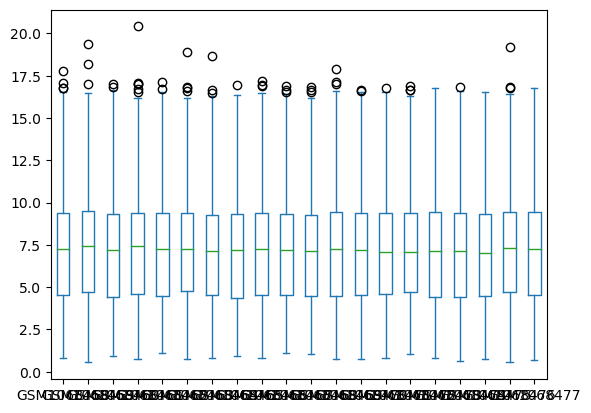

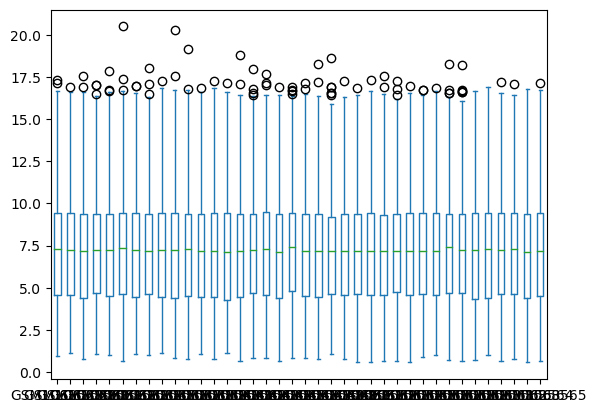

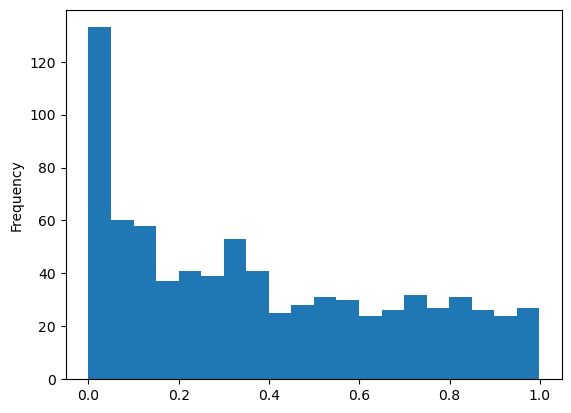

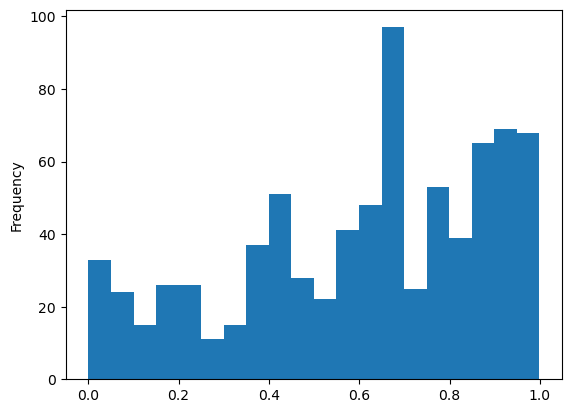

33

ID_REF
A_23_P208030     SYT4
A_24_P301501    CCL15
A_24_P91566      BMP7
A_23_P13914     DHX37
A_24_P86240     BMP2K
A_24_P40907     PLPP6
A_23_P251132    SNTG2
A_32_P7721       RORA
A_23_P51958      NBL1
A_24_P260371    PARM1
Name: IDENTIFIER, dtype: object



In [37]:
import matplotlib.pyplot as plt
import statsmodels.stats.multitest as SSM
import scipy.stats as S


metarows = list(range(160)) + [41269]
df = pd.read_csv('GDS5037.soft.gz',
                sep='\t',
                skipinitialspace=True,
                skiprows=metarows,
                index_col=0)

probes = pd.read_csv('52-probes.ids', header=None)[0]
group1 = pd.read_csv('52-control.ids', header=None)[0]
group2 = pd.read_csv('52-asthma.ids', header=None)[0]

filtered = df.loc[probes, pd.concat([group1, group2])]

# 1.

filtered.loc[probes, group1].plot.box()
plt.show()

filtered.loc[probes, group2].plot.box()
plt.show()

# no visible differences

# 2.

# https://www.tandfonline.com/doi/full/10.1080/23312025.2016.1220066
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2933223/
# https://genomebiology.biomedcentral.com/articles/10.1186/s13059-022-02648-4

fn = lambda s: S.ttest_ind(s[group1], s[group2]).pvalue
result = pd.DataFrame({'pvalue': filtered.apply(fn, axis=1)})
result['adjusted'] = SSM.multipletests(result.pvalue, method='fdr_bh')[1]

# 3.

result.pvalue.plot.hist(bins=20)
plt.show()

result.adjusted.plot.hist(bins=20)
plt.show()

# The Benjamini-Hochberg method controls the false discovery rate.

# "Other, more complicated techniques, such as Reiner et al. (2003), have been
#  developed for controlling false discovery rate that may be more appropriate
#  when there is lack of independence in the data. If you're using microarrays,
#  in particular, you need to become familiar with this topic."
#                  [ https://www.biostathandbook.com/multiplecomparisons.html ]

# 4.

print((result.adjusted <= 0.05).sum(), end="\n\n")

# 33 genes

# 5.

top = result.adjusted.sort_values()[:10]
print(df.loc[top.index].IDENTIFIER, end="\n\n")

# The probes with the smallest p-values correspond to SYT4, CCL15,
# BMP7, DHX37, BMP2K, PLPP6, SNTG2, RORA, NBL1, and PARM1.

In [26]:
# 3
df3=pd.read_csv("53-data.csv")


df3["weekday"]=df3["weekday"].replace({0:"mon", 1:"tue",2:"wed",3:"thu", 4:"fri",5:"sat",6:"sun"})
df3["month"]=df3["month"].replace({12:"jan", 1:"feb",2:"march",3:"april", 4:"may",5:"june",6:"july",7:"aug",8:"sep",9:"oct",10:"nov",11:"dec"})
print(df3.head(4))

   Eteläesplanadi  Kaivokatu  Kuusisaarentie  Merikannontie  Länsituulenkuja  \
0             999       1608             699           1287              646   
1             328        377             110            266              267   
2             316        474             252            564              228   
3            1149       1753             888           1537              730   

   year month  day weekday  
0  2017   dec   10     fri  
1  2017   dec   11     sat  
2  2017   dec   12     sun  
3  2017   dec   13     mon  


C:\Users\Faiza Anan Noor\AppData\Local\Temp\ipykernel_8212\1847597370.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean2=df3.groupby("weekday").mean()


<Axes: title={'center': ' mean daily number of cyclists for each street per month'}, xlabel='months', ylabel='mean'>

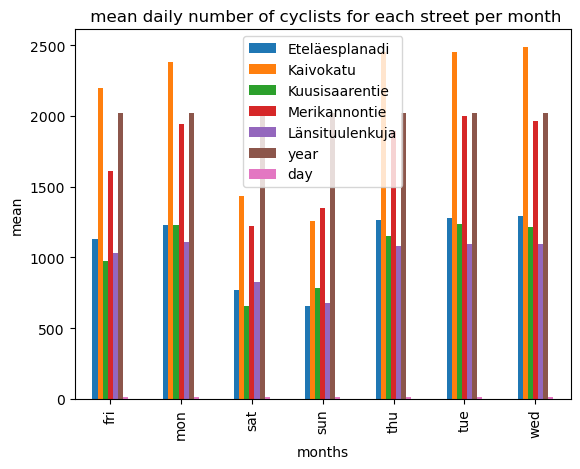

In [27]:
# 3.1 
#grouped_mean2=df3[(df3["weekday"]>=0) & (df3["weekday"]<=6)].groupby("weekday").mean()

grouped_mean2=df3.groupby("weekday").mean()
grouped_mean2.plot.bar(xlabel="months",ylabel="mean", title=" mean daily number of cyclists for each street per month")

C:\Users\Faiza Anan Noor\AppData\Local\Temp\ipykernel_8212\2245908887.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_mean=df3.groupby("month").mean()


<Axes: title={'center': ' mean daily number of cyclists for each street per weekday'}, xlabel='months', ylabel='mean'>

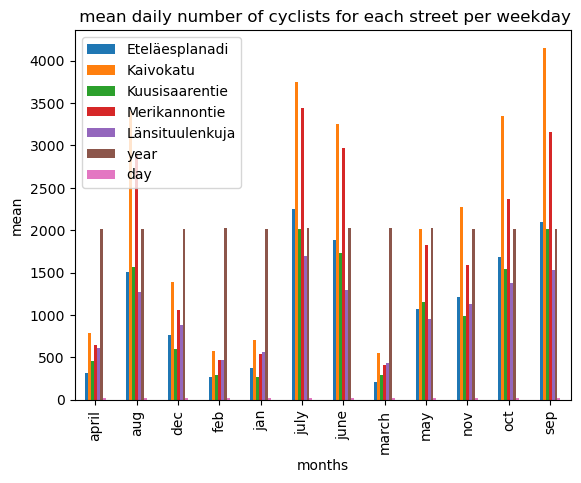

In [28]:
# 3.2 
grouped_mean=df3.groupby("month").mean()
grouped_mean
grouped_mean.plot.bar(xlabel="months",ylabel="mean", title=" mean daily number of cyclists for each street per weekday")

In [29]:
df3_corr=df3.iloc[:,0:5].corr(method='spearman')
print(df3_corr)


                 Eteläesplanadi  Kaivokatu  Kuusisaarentie  Merikannontie  \
Eteläesplanadi         1.000000   0.892638        0.892009       0.896663   
Kaivokatu              0.892638   1.000000        0.950914       0.962023   
Kuusisaarentie         0.892009   0.950914        1.000000       0.979178   
Merikannontie          0.896663   0.962023        0.979178       1.000000   
Länsituulenkuja        0.664733   0.635698        0.597560       0.599511   

                 Länsituulenkuja  
Eteläesplanadi          0.664733  
Kaivokatu               0.635698  
Kuusisaarentie          0.597560  
Merikannontie           0.599511  
Länsituulenkuja         1.000000  


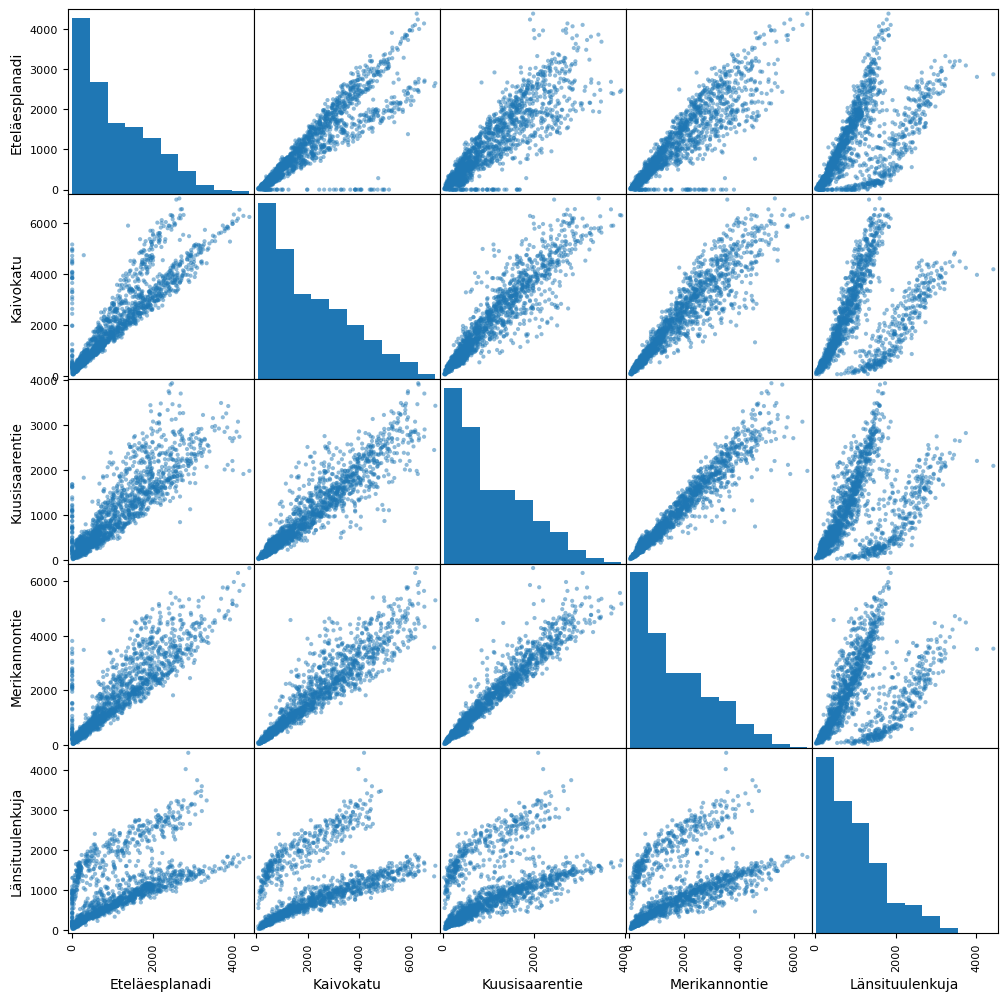

In [30]:

pd.plotting.scatter_matrix(df3.iloc[:,:5],figsize=(12,12))
plt.show()

## 4.

An advertisement company followed online customers to discover how effectively advertisements lure them to spend money. The data files `54-image.csv` and `54-video.csv` contain information on how much customers spent in total after clicking on advertisements.

Is there statistical evidence to claim that the total amount spent by customers is different if they click on image advertisements than on video advertisements?

image    2.655453e-11
video    8.710345e-13
dtype: float64

0.2537141492862989



0.002936586504802108

0.4554092683325749



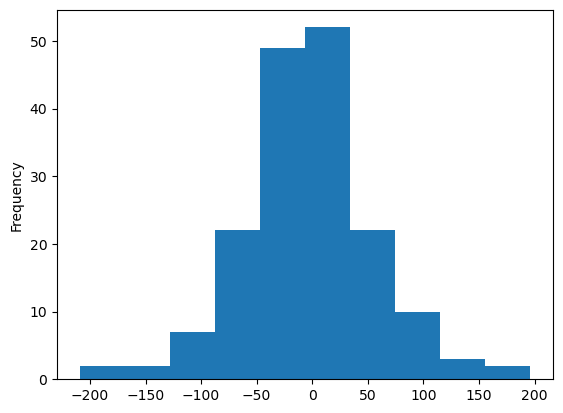



image    1.066698e-14
video    1.486372e-14
dtype: float64

0.01089662522981424



1.8378202639723895e-06

0.01990628690331958



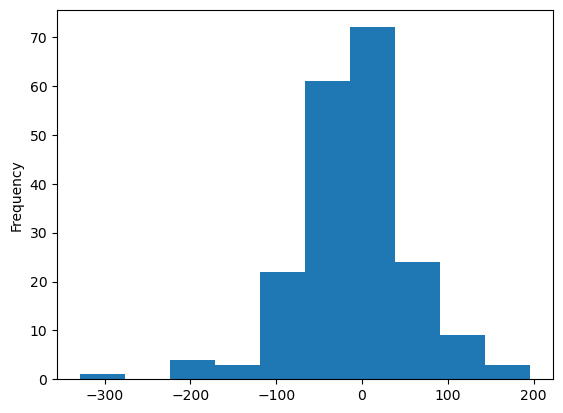

In [39]:
image = pd.read_csv('54-image.csv')
video = pd.read_csv('54-video.csv')
df = pd.merge(image, video, on='person_id', how='outer')
df.rename({'amount_spent_x': 'image',
           'amount_spent_y': 'video'}, axis=1, inplace=True)

# A) paired data without filling in zeroes
#   (OK if you can justify why)

case1 = df.copy()
case1.dropna(inplace=True)

# Wilcoxon signed-rank test
# (since distributions deviate greatly from normality)
print(case1[['image', 'video']].apply(lambda s: S.shapiro(s).pvalue), end="\n\n")
print(S.wilcoxon(case1.image, case1.video).pvalue, end="\n\n\n\n")

# T-test
# (since differences are close to normal)
case1['difference'] = case1.video - case1.image
print(S.shapiro(case1.difference).pvalue, end="\n\n")
print(S.ttest_rel(case1.image, case1.video).pvalue, end="\n\n")
case1.difference.plot.hist()
plt.show()
print("\n")

# B) paired data with filled-in zeroes
#   (OK if you can justify why)

case2 = df.copy()
case2.fillna(0, inplace=True)

# Wilcoxon signed-rank test
# (since distributions deviate greatly from normality)
print(case2[['image', 'video']].apply(lambda s: S.shapiro(s).pvalue), end="\n\n")
print(S.wilcoxon(case2.image, case2.video).pvalue, end="\n\n\n\n")

# T-test
# (since differences are close to normal)
case2['difference'] = case2.video - case2.image
print(S.shapiro(case2.difference).pvalue, end="\n\n")
print(S.ttest_rel(case2.image, case2.video).pvalue, end="\n\n")
case2.difference.plot.hist()
plt.show()
print("\n")